In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
fifa19_df=pd.read_csv('datasets/fifa19.csv')

# Key insights for presentation

## relationship between players age , wages , value within different overall ratings 
## relation between players nationalities and positions and their best attributes like speed 
## age and overall effect on players potential

# Dataset Overview
The data consists of information regarding fifa19 18207 players attributes , skills , clubs , overall , nationality , wages and other

## relationship between players age and value within different overall ratings
there is negative correlation between age and value within different overall ranges which makes sense that player valuer in transfer marktet decrease if he is older within the same overall range

In [2]:
# creating new categorial column that contains overall ranges 
overall_ranges=[45,65,70,75,80,85,90,95]
overall_labels=['45-65','65-70','70-75','75-80','80-85','85-90','90-95']
fifa19_df['Overall_Ranges']=pd.cut(fifa19_df['Overall'],bins=overall_ranges,labels=overall_labels)


                    correlation between age and value within different overall ranges


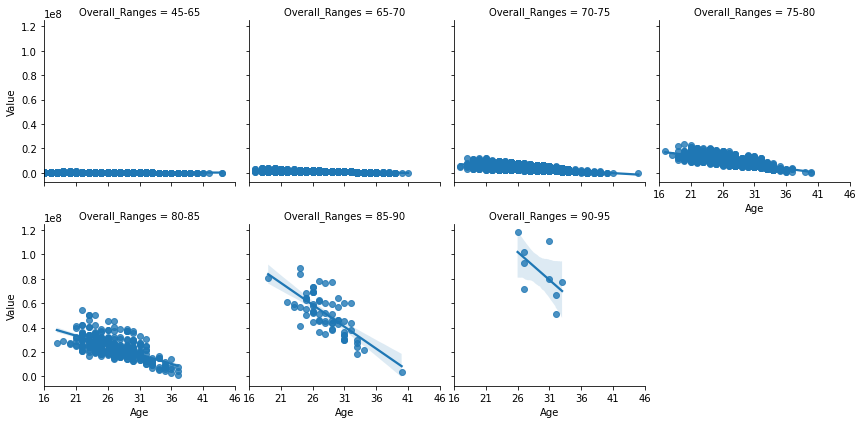

In [3]:
print('                    correlation between age and value within different overall ranges')
g = sb.FacetGrid(data = fifa19_df, col = 'Overall_Ranges', 
                margin_titles = True,col_wrap=4)
g.map(sb.regplot, 'Age', 'Value');
# adjusting the x-axis scale 
min_age=fifa19_df['Age'].min()
max_age=fifa19_df['Age'].max()
plt.xticks(np.arange(min_age,max_age +5, 5));

## relationship between players age and wage within different overall ratings
he negative correlation between age and wage is weaker and the overall range between 90 and 95 has positive correlation between age and value ! , which makes sense because old players that are legends like ronaldo and messi their age doesent affect their wage because thery add big value to their teams with leading skills and experience

                    correlation between age and wage within different overall ranges


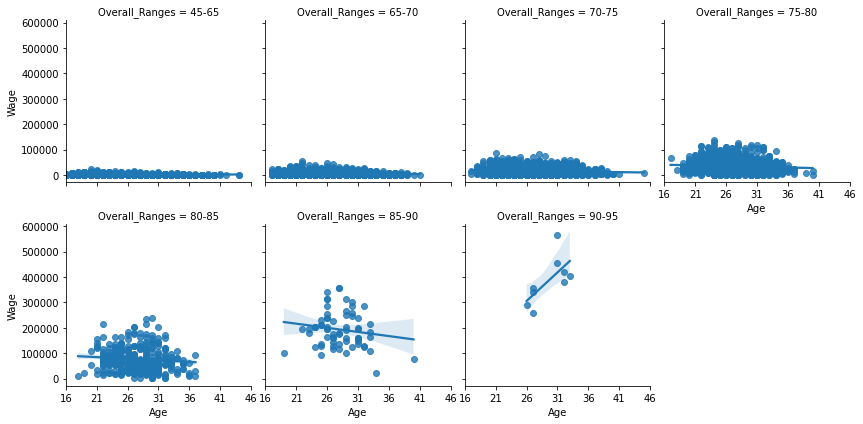

In [4]:
print('                    correlation between age and wage within different overall ranges')
g = sb.FacetGrid(data = fifa19_df, col = 'Overall_Ranges', 
                margin_titles = True,col_wrap=4)
g.map(sb.regplot, 'Age', 'Wage');
# adjusting the x-axis scale 
min_age=fifa19_df['Age'].min()
max_age=fifa19_df['Age'].max()
plt.xticks(np.arange(min_age,max_age +5, 5));

# relation between players position and sprint speed
 it makes a lot of sense that the wingers( RW ,LW ,LM ,RM ) have more speed than other positions   
 it makes sense that strikers are the ones with higher finishing
 

In [5]:
position_groupby=fifa19_df.groupby(['Position'])['SprintSpeed'].mean()
position_groupby=position_groupby.sort_values(ascending = True)


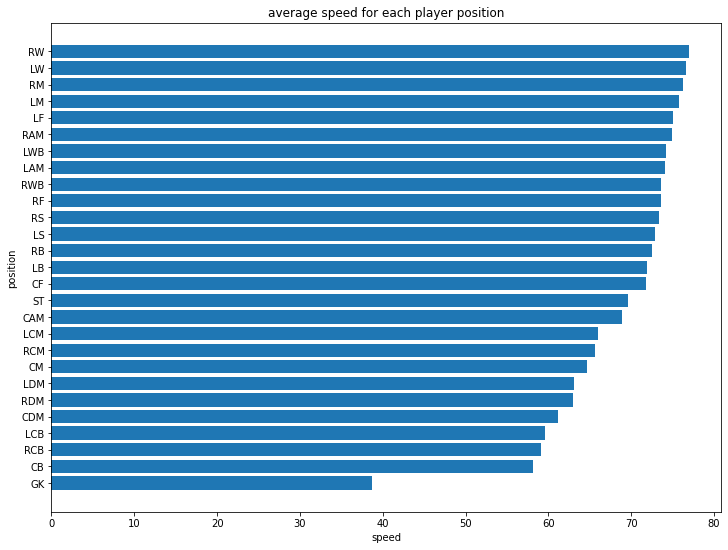

In [6]:
plt.figure(figsize=[12,9])
plt.barh(position_groupby.index,position_groupby)
plt.title('average speed for each player position')
plt.ylabel('position')
plt.xlabel('speed')
plt.show()

In [7]:
# grouping the position by the average finishing
finishing_groupby=fifa19_df.groupby(['Position'])['Finishing'].mean()
finishing_groupby=finishing_groupby.sort_values(ascending = True)

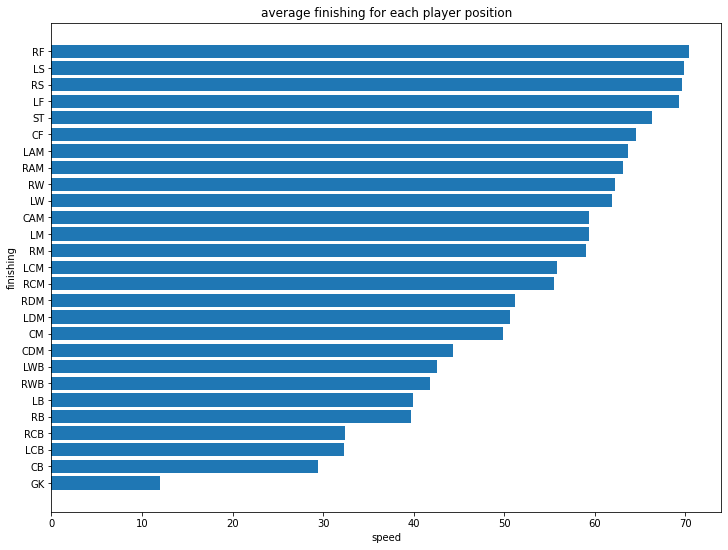

In [8]:
plt.figure(figsize=[12,9])
plt.barh(finishing_groupby.index,finishing_groupby)
plt.title('average finishing for each player position')
plt.ylabel('finishing')
plt.xlabel('speed')
plt.show()

# which are the top 10 nationalities of average players speed
african players are the fastest ! 9 of the top 10 are african countries

In [9]:
# first we will remove the countries which have less than 30 players so that we can take the average speed on enogth players
nation_counts=fifa19_df['Nationality'].value_counts(ascending=False)
fifa19_df2=fifa19_df.copy()
for nation in nation_counts[nation_counts<30].index:
    nation_index=fifa19_df2[ fifa19_df2['Nationality'] == nation ].index
    fifa19_df2.drop(nation_index, inplace = True)
    
nation_counts2=fifa19_df2['Nationality'].value_counts(ascending=False)  
# now lets group nations by their mean players speed and gety the top 10
nation_groupby=fifa19_df2.groupby(['Nationality'])['SprintSpeed'].mean()
nation_groupby=nation_groupby.reset_index()
top10_speed=nation_groupby.nlargest(10,['SprintSpeed'],keep='all')

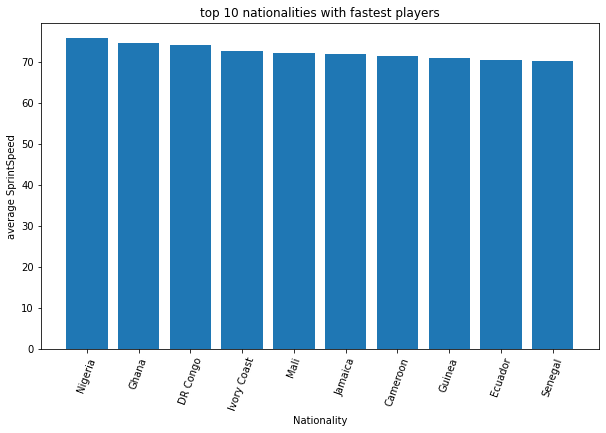

In [10]:
plt.figure(figsize=[10,6])
plt.bar(top10_speed['Nationality'], top10_speed['SprintSpeed'])
plt.xlabel('Nationality')
plt.ylabel('average SprintSpeed')
plt.xticks(rotation=70);
plt.title('top 10 nationalities with fastest players');

# age and overall effect on players potential
we can see that there is negative correlation between age and player potential which is logic and for players with higher overall ratings with the same age they have higher potential

Text(0.5, 1.0, 'age and overall effect on players potential')

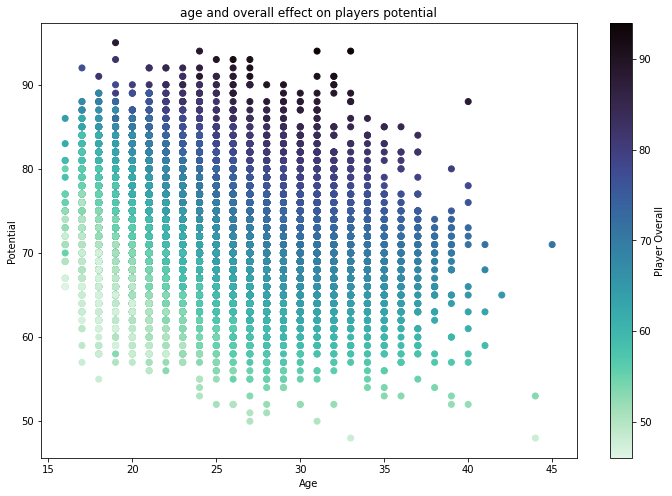

In [11]:
plt.figure(figsize=[12,8])
plt.scatter(data = fifa19_df, x = 'Age', y = 'Potential', c = 'Overall',
            cmap = 'mako_r')
cbar=plt.colorbar()
plt.xlabel('Age');
plt.ylabel('Potential');
cbar.ax.set_ylabel('Player Overall');
plt.title('age and overall effect on players potential')